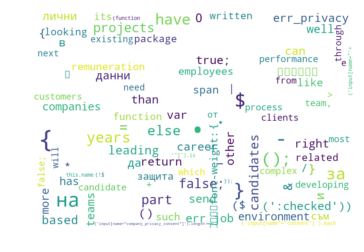

<Figure size 1440x1440 with 0 Axes>

In [41]:
import multidict as multidict

import numpy as np

import os
import re
from PIL import Image
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt


def getFrequencyDictForText(sentence):
    fullTermsDict = multidict.MultiDict()
    tmpDict = {}

    # making dict for counting frequencies
    for text in sentence.split(" "):
        if re.match("a|the|an|the|to|in|for|of|or|by|with|is|on|that|be", text):
            continue
        val = tmpDict.get(text, 0)
        tmpDict[text.lower()] = val + 1
    for key in tmpDict:
        fullTermsDict.add(key, tmpDict[key])
    return fullTermsDict

def makeImage(text):
    mask = np.array(Image.open("mouse.jpg"))

    wc = WordCloud(background_color="white", max_words=100, mask=mask)
    # generate word cloud
    wc.generate_from_frequencies(text)

    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.figure(figsize=(20,20))
    plt.show()


# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
makeImage(getFrequencyDictForText(full_text))

In [10]:
def getFrequencyNewWords(sentence, new_words ):
    fullTermsDict = multidict.MultiDict()
    tmpDict = {}

    # making dict for counting frequencies
    for text in sentence.split(" "):
        if re.match("a|the|an|the|to|in|for|of|or|by|with|is|on|that|be", text):
            continue
        val = tmpDict.get(text, 0)
        tmpDict[text.lower()] = val + 1
    for key in tmpDict:
        if key in new_words:
            fullTermsDict.add(key, tmpDict[key])
    print(fullTermsDict)
    return fullTermsDict


In [7]:
new_words = multidict.MultiDict([('syncplicity', 0.536446002030238),
 ('java', 0.1801146433819142),
 ('linux', 0.177105972288587),
 ('aws', 0.17189757770822728),
 ('axway', 0.1341115005075595),
 ('s3', 0.11627636375931179),
 ('ec2', 0.11627636375931179),
 ('jvm', 0.11053473216389281),
 ('networking', 0.09844122701106409),
 ('saas', 0.09541059137339426),
 ('automated', 0.09541059137339426),
 ('debugging', 0.09269959541564513),
 ('mvc', 0.08594878885411364)])

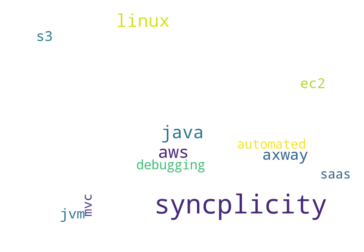

<Figure size 1440x1440 with 0 Axes>

In [11]:
makeImage(new_words)

In [12]:
keyphrases = multidict.MultiDict([('senior member', 0.2812052403247175),
 ('robust design', 0.2812052403247175),
 ('various entertainment', 0.2812052403247175),
 ('crisp definition', 0.2812052403247175),
 ('great opportunity', 0.25932954541363096),
 ('technical lead', 0.25932954541363096),
 ('senior developer', 0.25932954541363096),
 ('office space', 0.24380849286805553),
 ('depth knowledge', 0.23176942920434854),
 ('table tennis', 0.23176942920434854),
 ('full potential', 0.23176942920434854),
 ('architecture design', 0.21361604473997434),
 ('working time', 0.2064117454113936),
 ('verbal', 0.1943726817476866),
 ('regular team', 0.16901499795473163),
 ('international company', 0.15434360237222586),
 ('working environment', 0.1518337497389472),
 ('problem solving', 0.14493687062731764),
 ('competitive remuneration', 0.13510023937993812),
 ('remuneration package', 0.11824696847874398),
 ('java developer', 0.08151221831038559)])

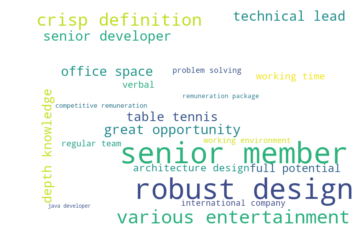

<Figure size 1440x1440 with 0 Axes>

In [13]:
makeImage(keyphrases)

In [32]:
df = pd.read_csv("jobsbg_javaInTitle.csv", header = None, names = ["Title", "Text"])
full_text = "\n\n\n\n".join(df['Text'])
full_text

'\n\n\nSenior Java Developer – Syncplicity\nWe are searching for a senior developer in our Java Syncplicity team. This team is responsible for Java/Linux based cloud micro-services and on-premises connectors that extend the capabilities of the Syncplicity SaaS offering. Working in the Syncplicity team gives you a great opportunity to learn some of the latest in Java, Linux, AWS, security and deployment technologies to advance your skills and career.\n                                                \n\n\n\n\n\n   \n\n\n\n\n\n\n\n\n\nI have the luxury to work with young and very talented people. When they\n                                                    are curious they can achieve great things. Technology is cool, but it\n                                                    is those special humans who can make a difference. Come join them.\n-Bojidar Ivanov, Senior Director of Engineering\n\n\nWhy Axway?\n\nA competitive remuneration package and real benefits.\nA future and a potentia

In [22]:
#getting technologies from wikipedia

import pandas as pd 
wiki_tech = pd.read_csv("java_technologies_wiki.csv")

wiki_java_tech = wiki_tech["technology "]
wiki_techs = [tech.lower() for tech in list(wiki_java_tech)]
len(wiki_techs)

235

In [23]:
java_technologies = ["JDBC", "Design Patterns", "concurreny", "threads", "servlets", "JSP EJB", "JPA", "JSF", "JAX-RS", "JAX-WS", 
                    "OOP", "apache", "SQL", "sql", "J2EE", "Microservices", "Angular", "React", "spring", "Big Data", "machine learning", 
                    "Blockchain", "aws", "java" ]

quora_techs = [tech.lower() for tech in java_technologies]

#makeImage(getFrequencyNewWords(text, techs))

In [24]:
techs = list(set(wiki_techs + quora_techs))
print(len(techs))
#makeImage(getFrequencyNewWords(text, techs))

257


In [34]:
tech_dict = dict()
for tech in techs: 
    if tech in full_text.lower():
        matches = len(re.findall(tech, full_text))
        if matches > 0: 
            tech_dict[tech] = matches

In [35]:
tech_dict

{'junit': 1,
 'threads': 3,
 'sql': 1,
 'microservices': 5,
 'aws': 1,
 'big data': 3,
 'servlets': 2,
 'spring': 1,
 'oop': 19,
 'design patterns': 23,
 'reactor': 1,
 'jetty': 1,
 'react': 2,
 'activiti': 23,
 'blockchain': 9,
 'mockito': 1,
 'machine learning': 2,
 'akka': 1,
 'java': 5,
 'play': 30}

In [36]:
tech_freq =  multidict.MultiDict(tech_dict)

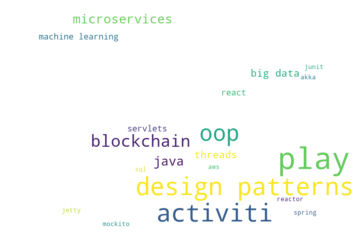

<Figure size 1440x1440 with 0 Axes>

In [37]:
makeImage(tech_freq)

In [38]:
pmi = multidict.MultiDict([('ago', 1947.1563755246882),
 ('save', 1947.1563755246882),
 ('alternative', 1080.3577309362786),
 ('report', 659.5207078390073),
 ('francisco', 439.6804718926715),
 ('screening', 360.1192436454262),
 ('disability', 339.1820783172037),
 ('veteran', 320.3386295218035),
 ('inc', 309.87004685769233),
 ('religion', 301.4951807264033),
 ('origin', 301.4951807264033),
 ('san', 266.94885793483627),
 ('type', 251.24598393866944),
 ('methods', 236.17122490234928),
 ('preferred', 224.02766901198024),
 ('status', 211.04662650848232),
 ('marital', 200.99678715093552),
 ('gender', 194.7156375524688),
 ('instructions', 182.15333835553537),
 ("bachelor's", 179.01276355630196)])

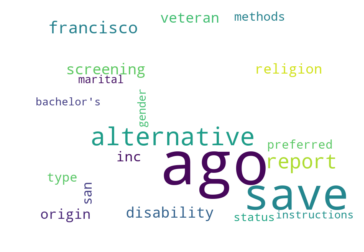

<Figure size 1440x1440 with 0 Axes>

In [39]:
makeImage(pmi)